In [99]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Constants and helper Functions

## Read in the file and show it's head

In [9]:
file = pd.read_csv("C:\\Users\\liamh\\Downloads\\raw_house_data.csv")

In [24]:
file.head()

,MLS,sold_price,zipcode,longitude,latitude,lot_acres,taxes,year_built,bedrooms,bathrooms,sqrt_ft,garage,kitchen_features,fireplaces,floor_covering,HOA
0,21530491,5300000.0,85637,-110.378200,31.356362,2154.00,5272.00,1941,13,10,10500,0,"Dishwasher, Freezer, Refrigerator, Oven",6,"Mexican Tile, Wood",0
1,21529082,4200000.0,85646,-111.045371,31.594213,1707.00,10422.36,1997,2,2,7300,0,"Dishwasher, Garbage Disposal",5,"Natural Stone, Other",0
2,3054672,4200000.0,85646,-111.040707,31.594844,1707.00,10482.00,1997,2,3,None,None,"Dishwasher, Garbage Disposal, Refrigerator",5,"Natural Stone, Other: Rock",None
3,21919321,4500000.0,85646,-111.035925,31.645878,636.67,8418.58,1930,7,5,9019,4,"Dishwasher, Double Sink, Pantry: Butler, Refri...",4,"Ceramic Tile, Laminate, Wood",None
4,21306357,3411450.0,85750,-110.813768,32.285162,3.21,15393.00,1995,4,6,6396,3,"Dishwasher, Garbage Disposal, Refrigerator, Mi...",5,"Carpet, Concrete",55


The header of the file and show it has succesfully loaded

## Clean data by removing all None values/empty values

In [166]:
fileRemovedNa = file.mask(file.eq('None')).dropna()

## Simple Statistical analysis, showing; Max, Min, STD, Mean, Mode and Q1 Q3

In [49]:
fileRemovedNa.describe(include ="all")

,MLS,sold_price,zipcode,longitude,latitude,lot_acres,taxes,year_built,bedrooms,bathrooms,sqrt_ft,garage,kitchen_features,fireplaces,floor_covering,HOA
count,4.370000e+03,4.370000e+03,4370.000000,4370.000000,4370.000000,4370.000000,4.370000e+03,4370.000000,4370.000000,4370,4370,4370,4370,4370,4370,4370
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15,2193,17,1301,10,230,371
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,3541,3,"Dishwasher, Garbage Disposal, Refrigerator, Mi...",1,"Carpet, Ceramic Tile",0
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1748,50,2520,1719,1583,1121,813
mean,2.151787e+07,7.787287e+05,85724.843707,-110.910171,32.323151,3.814593,9.686660e+03,1992.772769,3.901144,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,9.024373e+05,3.172634e+05,35.521438,0.117645,0.155190,46.530923,1.847110e+05,69.482868,1.011639,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,4.111258e+06,3.750000e+05,85118.000000,-112.520168,31.356362,0.000000,0.000000e+00,0.000000,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,2.140214e+07,5.882160e+05,85718.000000,-110.976402,32.285829,0.560000,4.849935e+03,1988.000000,3.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,2.160238e+07,6.800000e+05,85737.000000,-110.921446,32.320725,0.950000,6.281770e+03,1999.000000,4.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,2.172660e+07,8.400000e+05,85750.000000,-110.859173,32.400917,1.530000,8.151613e+03,2006.000000,4.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Distribution of the cost of the houses

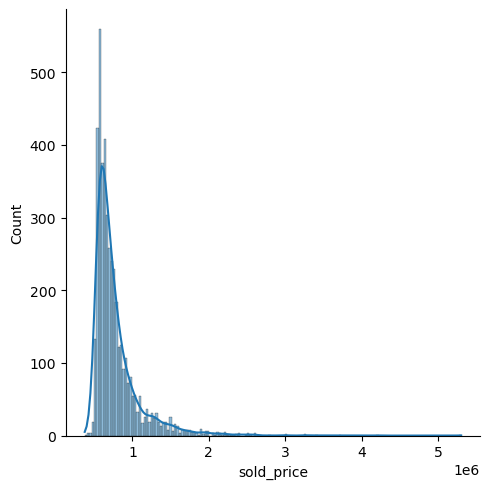

In [146]:
sns.displot(fileRemovedNa["sold_price"], kde = True)

The distribution of the sold_price in dollars. the prices strongly center around 50,000 - 100,000 with several outliers. Because of this I have decided to cut off any values above 300,000. As the Kernal density line reaches almost 0 and any value above 300,000 is 230,000 above the mean and well outside the 3 sigma for the standard deviation

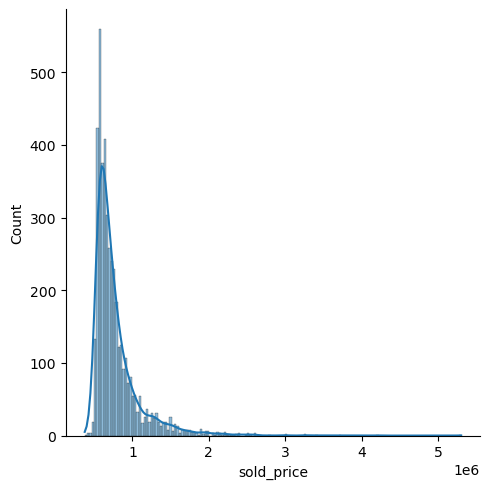

In [160]:
fileRemovedNa = fileRemovedNa[(fileRemovedNa["sold_price"] > 300000)]

sns.displot(fileRemovedNa["sold_price"], kde = True)

## Corrolation analysis on price to determine which values corrolate strongest with it.

In [89]:
corrolation = fileRemovedNa.drop(columns = ["MLS","longitude","latitude","kitchen_features","floor_covering"])

In [92]:
corrolation = corrolation.corrwith(corrolation["sold_price"])
corrolation

sold_price    1.000000
zipcode      -0.056530
lot_acres     0.284289
taxes         0.023726
year_built   -0.012012
bedrooms      0.152415
dtype: float64

Removed latitude and longitude due to it charting effectivly the same thing as zipcode. MLS as it is the name of the house and unimportant for learning about the relation to sale price. 

Interestingly sale price is strongly negativly corrolateded with zipcode which seems to show that the positioning of the house is one of the most important factors in sale price. 

The strongly corrolated variable is the lot_acres, and number of bedrooms. 

## Scatter plots of the various items that strongly corrolate with sold price

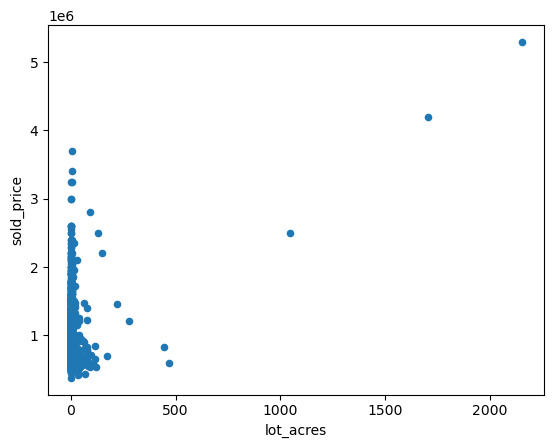

In [104]:
acresSold = fileRemovedNa.plot.scatter(x = "lot_acres", y = "sold_price")

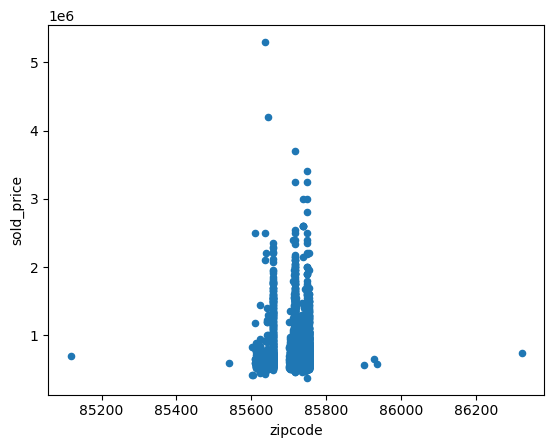

In [105]:
 zipSold = fileRemovedNa.plot.scatter(x = "zipcode", y = "sold_price")

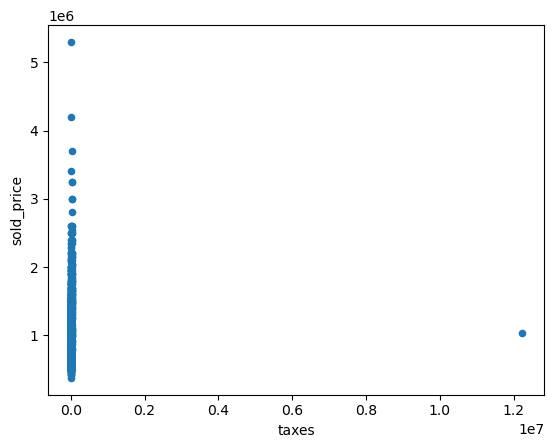

In [151]:
taxesSold = fileRemovedNa.plot.scatter(x = "taxes", y = "sold_price")

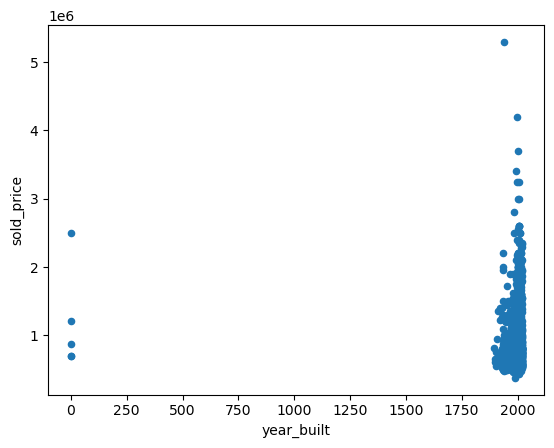

In [152]:
yearSold = fileRemovedNa.plot.scatter(x = "year_built", y = "sold_price")

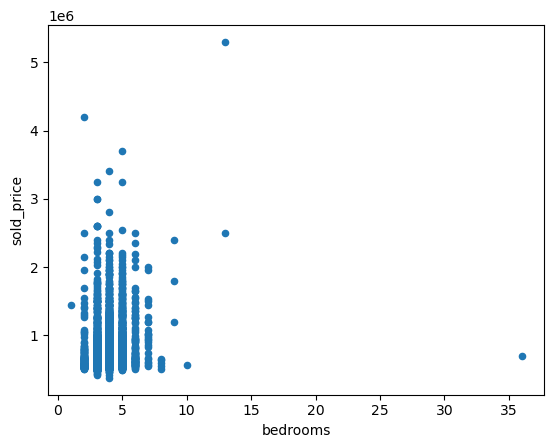

In [153]:
bedSold = fileRemovedNa.plot.scatter(x = "bedrooms", y = "sold_price")

I have made the decision to remove several outliers namely bedrooms above 15. Sold age = 0 is obvously a missing value error so remove those. same with taxes  and the value which is 1e-7. Lot acres I am not removing outliers as they seem to be following a curve or at least have some relationship with value_sold. 

In [198]:
fileRemovedNa = fileRemovedNa[~(fileRemovedNa["bedrooms"] >15)]
fileRemovedNa = fileRemovedNa[(fileRemovedNa["year_built"] != 0)]
fileRemovedNa = fileRemovedNa[~(fileRemovedNa["taxes"] > 100000)]

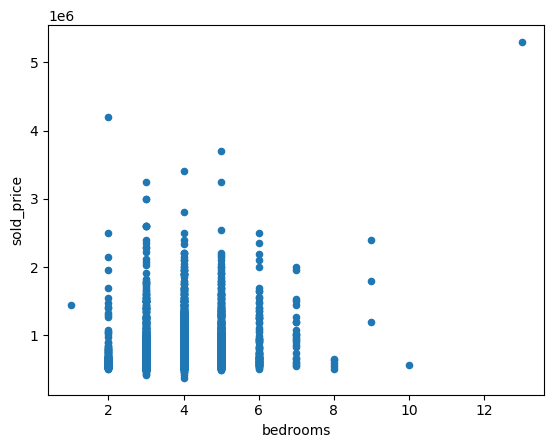

In [199]:
bedSold = fileRemovedNa.plot.scatter(x = "bedrooms", y = "sold_price")

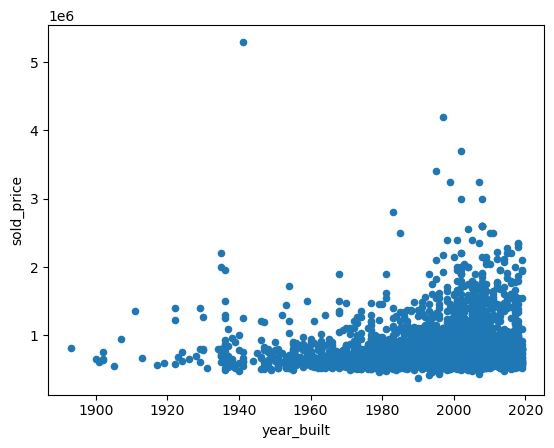

In [200]:
yearSold = fileRemovedNa.plot.scatter(x = "year_built", y = "sold_price")

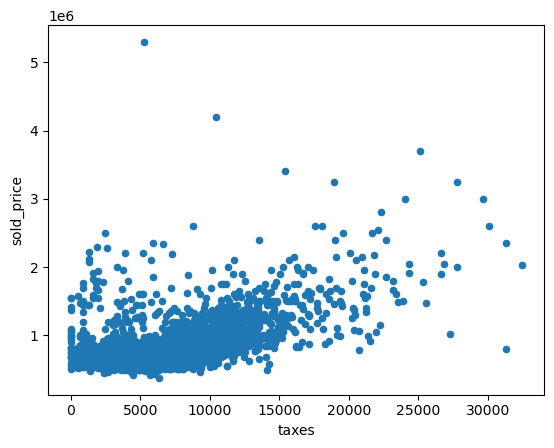

In [201]:
taxesSold = fileRemovedNa.plot.scatter(x = "taxes", y = "sold_price")

In [202]:
corrolation = fileRemovedNa.drop(columns = ["MLS","longitude","latitude","kitchen_features","floor_covering"])
corrolation = corrolation.corrwith(corrolation["sold_price"])
corrolation

sold_price    1.000000
zipcode      -0.053537
lot_acres     0.282467
taxes         0.583433
year_built    0.130398
bedrooms      0.165840
dtype: float64

By removing the outliers especialy with the single tax value the taxes becomes massivly more corrolated with sold_price. Whereas bedrooms and taxes remains the same. 

## Looking at the count in the text based fields 

In [106]:
fileRemovedNa["kitchen_features"].value_counts()

Dishwasher, Garbage Disposal, Refrigerator, Microwave, Oven                                                                                                                                                         1719
Dishwasher, Garbage Disposal, Microwave, Oven                                                                                                                                                                        270
Compactor, Dishwasher, Garbage Disposal, Refrigerator, Microwave, Oven                                                                                                                                               189
Dishwasher, Garbage Disposal, Refrigerator, Oven                                                                                                                                                                     181
Dishwasher, Freezer, Garbage Disposal, Refrigerator, Microwave, Oven                                                                

In [107]:
fileRemovedNa["floor_covering"].value_counts()

Carpet, Ceramic Tile                               1121
Carpet, Natural Stone                               543
Carpet, Ceramic Tile, Wood                          228
Carpet, Natural Stone, Wood                         200
Ceramic Tile                                        199
                                                   ... 
Mexican Tile, Other: San Marcos Mex Tile              1
Other: 100% Porcelain Tile                            1
Carpet, Natural Stone, Other: Brick Floor             1
Carpet, Concrete, Mexican Tile, Wood                  1
Carpet, Ceramic Tile, Other: Wood Plan Laminate       1
Name: floor_covering, Length: 230, dtype: int64

In [127]:
fileReducedFeatures = fileRemovedNa[fileRemovedNa.groupby('kitchen_features').kitchen_features.transform('count')>5].copy()
fileReducedFeatures= fileReducedFeatures[fileReducedFeatures.groupby('floor_covering').floor_covering.transform('count')>3].copy()

In [121]:
fileReducedFeatures["kitchen_features"].value_counts()

Dishwasher, Garbage Disposal, Refrigerator, Microwave, Oven                                                                                     1719
Dishwasher, Garbage Disposal, Microwave, Oven                                                                                                    270
Compactor, Dishwasher, Garbage Disposal, Refrigerator, Microwave, Oven                                                                           189
Dishwasher, Garbage Disposal, Refrigerator, Oven                                                                                                 181
Dishwasher, Freezer, Garbage Disposal, Refrigerator, Microwave, Oven                                                                             127
Dishwasher, Refrigerator, Microwave, Oven                                                                                                         97
Dishwasher, Garbage Disposal, Oven                                                                        

In [124]:
fileReducedFeatures["floor_covering"].value_counts()

Carpet, Ceramic Tile             770
Carpet, Natural Stone            411
Carpet, Ceramic Tile, Wood       168
Carpet, Natural Stone, Wood      154
Concrete                         135
                                ... 
Carpet, Vinyl, Wood                4
Carpet, Mexican Tile, Other        4
Natural Stone, Wood, Other         4
Ceramic Tile, Concrete, Other      4
Natural Stone, Other               4
Name: floor_covering, Length: 64, dtype: int64

In [126]:
#convert to lists so that we can then turn these lists into a dictionary which we then match with each occurance in the data frame
#so that we can turn each occurance of the combination of words
kitchenFeaturesList = fileReducedFeatures["kitchen_features"].to_list()

floorCoveringList = fileReducedFeatures["floor_covering"].to_list()
